In [1]:
#pip install seaborn

In [2]:
#pip install pandas

In [3]:
import pandas as pd
col_names = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']

In [4]:
prain=pd.read_csv("D:/data/tan/train.csv",header=None,names=col_names)

In [5]:
prain.head()

,Frost_pt,Temp_MAX,Temp_MIN,Specific_Hum,Relative_Hum,Winds_Max,Winds_Min,Rain,cDay,Rain1,Rain2,Rain3,Rain4,Rain5
0,0.40,19.01,7.75,4.03,46.31,1.68,0.44,0,10001,0,1,0,0,0
1,0.89,20.65,8.19,4.21,43.44,1.91,0.69,0,10002,1,0,0,0,0
2,1.78,21.88,9.58,4.58,46.19,3.71,0.72,1,10003,0,0,0,0,0
3,5.84,21.40,7.73,5.92,64.12,4.48,1.26,0,10004,0,0,0,0,0
4,3.69,19.09,5.12,5.13,62.69,2.29,0.28,0,10005,0,0,0,0,0


In [6]:
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
x=prain[feature_cols]
y0=prain.Rain
y1=prain.Rain1
y2=prain.Rain2
y3=prain.Rain3
y4=prain.Rain4
y5=prain.Rain5

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y0_train,y0_test=train_test_split(x,y0,test_size=0.25,random_state=10)

In [8]:
#pip install -U scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg=LogisticRegression(random_state=20)

In [11]:
logreg.fit(x_train,y0_train)

C:\Users\Ravindra\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [12]:
history=logreg.fit(x_train,y0_train)

C:\Users\Ravindra\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y0_pred= logreg.predict(x_test)

In [14]:
x_test

,Frost_pt,Temp_MAX,Temp_MIN,Specific_Hum,Relative_Hum,Winds_Max,Winds_Min
2965,7.61,24.89,11.73,6.65,55.00,3.59,1.11
1296,25.05,29.29,24.78,20.81,89.06,3.37,0.58
3630,5.11,22.87,10.10,5.62,50.69,1.82,0.50
349,5.55,19.30,9.23,5.86,61.19,1.75,0.73
3395,11.37,33.69,19.85,8.67,40.56,3.34,0.77
...,...,...,...,...,...,...,...
216,25.05,28.30,25.47,20.69,91.81,4.19,0.45
2667,3.69,42.96,26.83,5.13,14.94,3.28,1.09
4024,8.48,25.50,12.31,7.20,60.19,2.41,1.13
3705,12.35,23.54,13.69,9.22,70.19,1.37,0.27


In [15]:
from sklearn import metrics
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

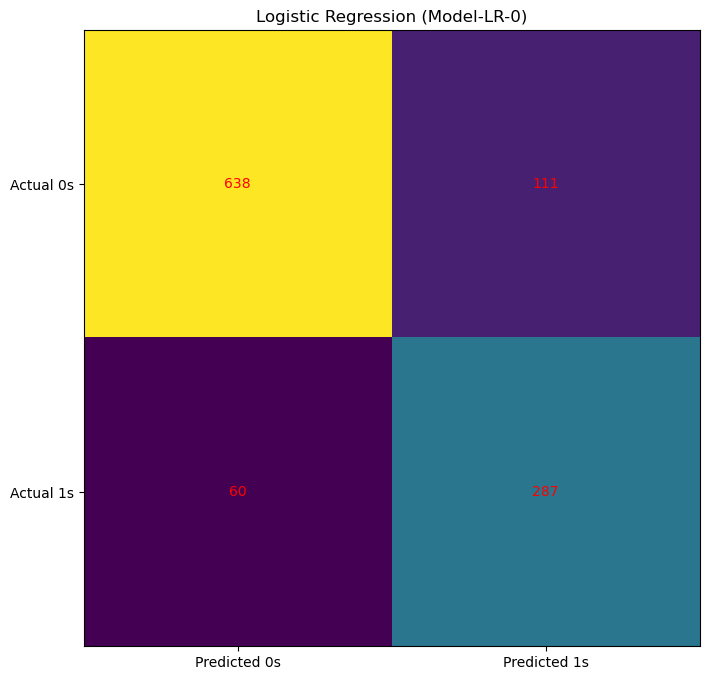

In [16]:
cnf_matrix=metrics.confusion_matrix(y0_pred,y0_test)
cnf_matrix
#cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cnf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cnf_matrix[i, j], ha='center', va='center', color='red')
plt.title('Logistic Regression (Model-LR-0)')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#class_names=[0,1]
#fig,ax=plt.subplots()
#tick_marks=np.arange(len(class_names))
#plt.xticks(tick_marks,class_names)
#plt.yticks(tick_marks,class_names)

Text(0.5, 23.52222222222222, 'Predicted label')

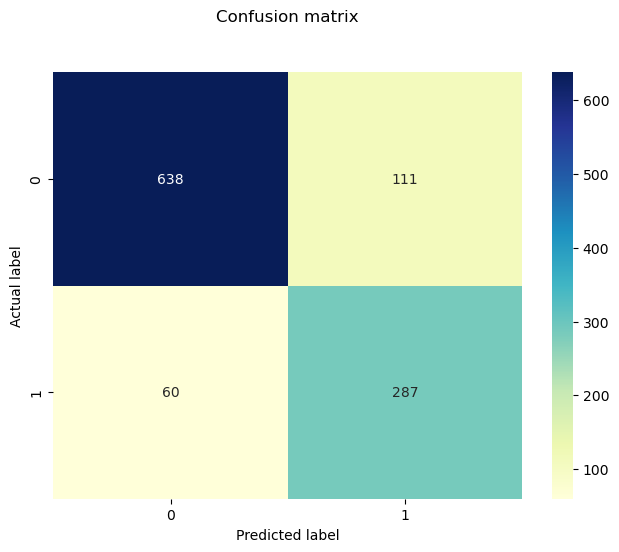

In [19]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
##fig, ax = plt.subplots(figsize=(8, 8))
#ax.imshow(cm)
#ax.grid(False)
#ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
#ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
#ax.set_ylim(1.5, -0.5)
#for i in range(2):
#    for j in range(2):
#        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
#plt.show()

In [23]:
#loss = history.history['loss']
#print(loss)
#loss=metrics.log_loss(y0_test,y0_pred_proba)
#print ( str(loss))

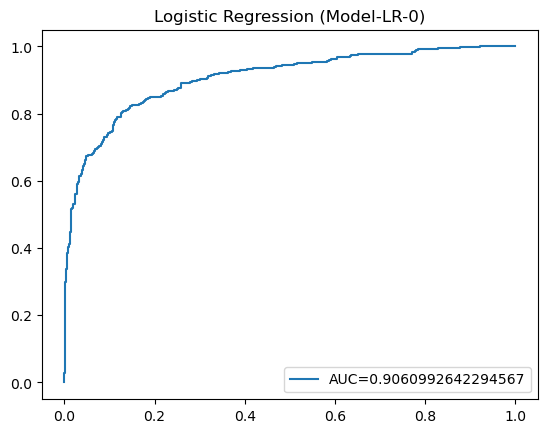

In [24]:
y0_pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y0_test,y0_pred_proba)
auc=metrics.roc_auc_score(y0_test,y0_pred_proba)
loss=metrics.log_loss(y0_test,y0_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Logistic Regression (Model-LR-0)')
plt.legend(loc=4)
plt.show()

In [25]:
print("intercept")
print(logreg.intercept_)
print("cofes")
print(logreg.coef_)

intercept
[9.57313318]
cofes
[[ 0.21752498 -0.66173176  0.53386639  0.05751792 -0.09800208  0.53665334
  -0.32536792]]


In [26]:
#Jan
import numpy as np
pr=pd.read_csv("D:/data/tan/i01J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)

d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

#print(y5_pred1)
#print(pr.Rain5)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        1          1
5        1          0
6        0          0
7        1          1
8        1          0
9        1          0
10       1          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       1          0
20       0          0
21       1          1
22       1          1
23       1          0
24       1          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [27]:
#feb
import numpy as np
pr=pd.read_csv("D:/data/tan/i02F.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)


    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        1          0
4        0          0
5        0          0
6        0          0
7        1          0
8        1          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       1          0
26       0          0
27       0          0


In [28]:
#march
import numpy as np
pr=pd.read_csv("D:/data/tan/i03M.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)


    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [29]:
#Apr
import numpy as np
pr=pd.read_csv("D:/data/tan/i04A.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          1
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [30]:
#may
import numpy as np
pr=pd.read_csv("D:/data/tan/i05M.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          1
3        1          0
4        1          0
5        0          0
6        0          0
7        1          0
8        1          1
9        1          1
10       1          0
11       1          0
12       1          0
13       0          0
14       0          0
15       0          0
16       1          0
17       0          0
18       0          0
19       1          0
20       1          0
21       1          0
22       1          0
23       1          1
24       0          0
25       0          0
26       0          0
27       1          1
28       1          0
29       0          0
30       0          0


In [31]:
#June
import numpy as np
pr=pd.read_csv("D:/data/tan/i06J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       1          0
12       0          0
13       0          1
14       0          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          0
21       0          0
22       1          0
23       0          0
24       0          0
25       1          1
26       1          1
27       1          1
28       1          1
29       1          1


In [32]:
#July
import numpy as np
pr=pd.read_csv("D:/data/tan/i07J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        0          1
4        1          1
5        1          1
6        0          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       0          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       1          1
27       1          1
28       1          0
29       1          1
30       1          1


In [33]:
#aug
import numpy as np
pr=pd.read_csv("D:/data/tan/i08A.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        0          1
6        1          1
7        0          1
8        0          1
9        1          1
10       1          1
11       0          1
12       0          1
13       1          1
14       1          1
15       0          1
16       0          1
17       0          1
18       1          1
19       1          1
20       0          1
21       1          1
22       1          1
23       1          1
24       1          1
25       0          1
26       0          1
27       1          1
28       1          1
29       1          1
30       0          1


In [34]:
#sep
import numpy as np
pr=pd.read_csv("D:/data/tan/i09S.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        0          1
3        0          1
4        0          1
5        0          0
6        1          0
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          0
27       0          1
28       0          1
29       0          1


In [35]:
#oct
import numpy as np
pr=pd.read_csv("D:/data/tan/i10O.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        0          1
3        0          1
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          0
11       1          0
12       0          0
13       0          1
14       0          1
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [36]:
#nov
import numpy as np
pr=pd.read_csv("D:/data/tan/i11N.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          1
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [37]:
#DEc
import numpy as np
pr=pd.read_csv("D:/data/tan/i12D.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y0_pred1=logreg.predict(X_new1)
d={

'Actual':pr.Rain,
'Predicted':y0_pred1}
df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0
